In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import helpers as h # helper functions for data cleaning and processing

### Load Data

In [2]:
ac = pd.read_csv('../data/portable_ac_reviews.csv')
ac_more = pd.read_csv('../data/more_portable_ac.csv')

In [3]:
ac = ac.append(ac_more)

### Clean Data

In [4]:
cleaned_ac = h.cleaned_reviews_dataframe(ac)

### Get Polarity and Subjectivity Measures for Sentiment Analysis

In [8]:
cleaned_ac = h.get_sentiment(cleaned_ac)
cleaned_ac['rating'] = cleaned['rating'].map

Index(['Unnamed: 0.1', 'asin', 'product', 'date', 'verified', 'title', 'desc',
       'reviewer_name', 'rating', 'title_desc', 'Subjectivity', 'Polarity',
       'Analysis'],
      dtype='object')

In [20]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

def plotly_path(polarity, subjectivity, ratings):
    fig = go.Figure(data=go.Scatter3d(
        x=polarity, y=subjectivity, z=ratings,
        marker=dict(
            size=8,
            color=polarity,
            colorscale='Viridis',
        ),
        line=dict(
            color=None,
            width=0
        )
    ))
    fig.update_layout(
    width=800,
    height=700,
    autosize=False,
    scene=dict(
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=0,
                y=1.0707,
                z=1,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
        ),
    )
    fig.show()

In [21]:
plotly_path(cleaned_ac['Polarity'], cleaned_ac['Subjectivity'], cleaned_ac['rating'])

In [29]:
import plotly.express as px

fig = px.scatter_3d(
cleaned_ac[(cleaned_ac.rating == 1) | (cleaned_ac['rating'] == 5)], x='Polarity', y='rating', z='Subjectivity',  color='Polarity',
size='Subjectivity', size_max=20
)

fig.show()

### Split Reviews into Positive and Negative Categories

In [8]:
cleaned_ac_neg, cleaned_ac_pos = h.pos_neg_split(cleaned_ac)

In [78]:
cleaned_ac_neg.shape

(210, 12)

### NLP Preprocessing - Tokenization, Lemmatization, Stopwords Removal, N-Grams

In [9]:
import preprocess as pre # pipeline for nlp preprocessing (tokenization, lemmatization, etc)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ryankirkland/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
neg_preprocessed = pre.preprocess_corpus(cleaned_ac_neg['title_desc'].tolist())
pos_preprocessed = pre.preprocess_corpus(cleaned_ac_pos['title_desc'].tolist())

removing punctuation
recommended for only a very small space  unit is a small swamp cooler unfortunately too small to be effective for any area would need to be at least double in size to be effective fan speed would also need to be increased by at least twice
removing stop words
Step 2: recommended small space unit small swamp cooler unfortunately small effective area would need least double size effective fan speed would also need increased least twice
tokenizing
Step 3: ['recommended', 'small', 'space', 'unit', 'small', 'swamp', 'cooler', 'unfortunately', 'small', 'effective', 'area', 'would', 'need', 'least', 'double', 'size', 'effective', 'fan', 'speed', 'would', 'also', 'need', 'increased', 'least', 'twice', 'recommended small', 'small space', 'space unit', 'unit small', 'small swamp', 'swamp cooler', 'cooler unfortunately', 'unfortunately small', 'small effective', 'effective area', 'area would', 'would need', 'need least', 'least double', 'double size', 'size effective', 'effec

Step 3: ['completely', 'worthless', 'work', 'dont', 'waste', 'time', 'money', 'cool', 'fact', 'raised', 'temperature', 'room', '2', 'degrees', 'letting', 'run', 'hour', 'absolutely', 'zero', 'cooling', 'effect', 'whatsoever', 'called', 'customer', 'service', 'said', 'unit', 'defective', 'offered', 'send', 'replacement', 'said', 'replacement', 'might', 'defective', 'told', 'common', 'unit', 'damaged', 'transit', 'replacement', 'might', 'work', 'either', 'sounds', 'like', 'selling', 'horrible', 'product', 'amd', 'aware', 'horrible', 'product', 'worst', 'purchase', 'ive', 'ever', 'made', 'amazon', 'highly', 'reccomend', 'buying', 'different', 'air', 'conditioner', 'one', 'completely', 'worthless', 'completely worthless', 'worthless work', 'work dont', 'dont waste', 'waste time', 'time money', 'money cool', 'cool fact', 'fact raised', 'raised temperature', 'temperature room', 'room 2', '2 degrees', 'degrees letting', 'letting run', 'run hour', 'hour absolutely', 'absolutely zero', 'zero co

Step 3: ['best', 'buy', 'ever', 'soooo', 'thankful', 'tortured', 'heat', 'quieter', 'fans', 'got', 'cold', 'airwe', 'get', 'ac', 'unit', 'couple', 'weeks', '2', 'maybe', 'wouldnt', 'need', 'aci', 'highly', 'recommend', 'sounds', 'silly', 'almost', 'making', 'cry', 'im', 'thankful', 'heat', 'nightmare', 'best buy', 'buy ever', 'ever soooo', 'soooo thankful', 'thankful tortured', 'tortured heat', 'heat quieter', 'quieter fans', 'fans got', 'got cold', 'cold airwe', 'airwe get', 'get ac', 'ac unit', 'unit couple', 'couple weeks', 'weeks 2', '2 maybe', 'maybe wouldnt', 'wouldnt need', 'need aci', 'aci highly', 'highly recommend', 'recommend sounds', 'sounds silly', 'silly almost', 'almost making', 'making cry', 'cry im', 'im thankful', 'thankful heat', 'heat nightmare']
lemmatizing
removing punctuation
little air conditioner works great  im always a bit skeptical about buying stuff without trying it first i read the reviews i usually start with the 1s to see what they complain about i only

small frustrations still happy  for the most part we love this the problem is that in the last 2 months the remote has stopped working twice i change the rechargeable batteriesit works i plug the batteries in to recharge they still have half a charge once the control panel on the device quit as well we unplugged it waited plugged it back in still not working tried again but decided to drain it even though the panel didnt indicate any problems that must have been it its working again
removing stop words
Step 2: small frustrations still happy part love problem last 2 months remote stopped working twice change rechargeable batteriesit works plug batteries recharge still half charge control panel device quit well unplugged waited plugged back still working tried decided drain even though panel didnt indicate problems must working
tokenizing
Step 3: ['small', 'frustrations', 'still', 'happy', 'part', 'love', 'problem', 'last', '2', 'months', 'remote', 'stopped', 'working', 'twice', 'change'

Step 3: ['best', 'one', 'owned', 'portable', 'ac', 'made', 'amazon', 'one', 'delonghi', 'amazon', 'one', 'favorite', 'received', 'one', 'similar', 'amazons', 'adds', 'features', 'push', 'top', 'delonghi', 'makes', 'much', 'noise', 'beyond', 'portable', 'ac', 'even', 'considerationthis', 'ac', 'unit', 'louvers', 'front', 'top', 'much', 'better', 'job', 'air', 'distribution', 'louvers', 'also', 'larger', 'machinesthe', 'setup', 'quick', 'easy', 'piece', 'goes', 'window', 'easy', 'put', 'place', 'slightly', 'wider', 'amazon', 'model', 'delonghi', 'even', 'running', 'piece', 'placed', 'window', 'stayed', 'right', 'needed', 'closed', 'window', 'top', 'machine', 'used', 'infrequently', 'simply', 'placed', 'weatherstripping', 'visible', 'cracks', 'blocked', 'opening', 'keep', 'cold', 'air', 'bugs', 'outthe', 'app', 'never', 'install', 'phone', 'kept', 'failing', '2nd', 'step', 'apps', 'always', 'magically', 'work', 'attempts', 'real', 'reason', 'install', 'app', 'remote', 'works', 'great', 'n

Step 3: ['solid', 'cooling', 'dehumidifying', 'happy', 'air', 'conditioner', 'fairly', 'easy', 'install', 'easy', 'operate', 'works', 'well', 'draining', 'water', 'tube', 'provided', 'bit', 'hassle', 'overall', 'good', 'buy', 'providing', 'great', 'cooling', 'dehumidifying', 'options', 'smalltomediumsized', 'living', 'spacesthe', 'remote', 'works', 'well', 'keeps', 'apprised', 'current', 'temperature', 'iphoneandroid', 'app', 'provides', 'another', 'easy', 'way', 'control', 'unit', 'solid cooling', 'cooling dehumidifying', 'dehumidifying happy', 'happy air', 'air conditioner', 'conditioner fairly', 'fairly easy', 'easy install', 'install easy', 'easy operate', 'operate works', 'works well', 'well draining', 'draining water', 'water tube', 'tube provided', 'provided bit', 'bit hassle', 'hassle overall', 'overall good', 'good buy', 'buy providing', 'providing great', 'great cooling', 'cooling dehumidifying', 'dehumidifying options', 'options smalltomediumsized', 'smalltomediumsized livin

removing punctuation
looks so cute  we love this cute small fan very much because we can carry it to everywhere always turn it to the highest when we use it love it so much
removing stop words
Step 2: looks cute love cute small fan much carry everywhere always turn highest use love much
tokenizing
Step 3: ['looks', 'cute', 'love', 'cute', 'small', 'fan', 'much', 'carry', 'everywhere', 'always', 'turn', 'highest', 'use', 'love', 'much', 'looks cute', 'cute love', 'love cute', 'cute small', 'small fan', 'fan much', 'much carry', 'carry everywhere', 'everywhere always', 'always turn', 'turn highest', 'highest use', 'use love', 'love much']
lemmatizing
removing punctuation
works as a fan  this does not really cool more than a normal fani have yet to see the ionizing lights turn onafter 3 days it started making a weird sound as well the sound occurs only on the lowest fan speed settingit still works but this is definitely no air conditioning unit
removing stop words
Step 2: works fan really

removing punctuation
dont bother  cheap not up to the task what a joke
removing stop words
Step 2: dont bother cheap task joke
tokenizing
Step 3: ['dont', 'bother', 'cheap', 'task', 'joke', 'dont bother', 'bother cheap', 'cheap task', 'task joke']
lemmatizing
removing punctuation
my friends like it very much  portable air conditioner help me get cool and comfortablemy friends and parents likes it very muchits small and easy to carry around it cools the room very well and cools the room very quicklythe wind was soft and there was no stimulation for the children
removing stop words
Step 2: friends like much portable air conditioner help get cool comfortablemy friends parents likes muchits small easy carry around cools room well cools room quicklythe wind soft stimulation children
tokenizing
Step 3: ['friends', 'like', 'much', 'portable', 'air', 'conditioner', 'help', 'get', 'cool', 'comfortablemy', 'friends', 'parents', 'likes', 'muchits', 'small', 'easy', 'carry', 'around', 'cools', 'ro

removing punctuation
the best personal ac  this is a life saving product i work in an office and it tends to be very hot and this comes to my safety all the time add some ice and water and youre set to stay nice and cool during the whole day i love the fact that its battery operated as well and it lasts so long highly recommended
removing stop words
Step 2: best personal ac life saving product work office tends hot comes safety time add ice water youre set stay nice cool whole day love fact battery operated well lasts long highly recommended
tokenizing
Step 3: ['best', 'personal', 'ac', 'life', 'saving', 'product', 'work', 'office', 'tends', 'hot', 'comes', 'safety', 'time', 'add', 'ice', 'water', 'youre', 'set', 'stay', 'nice', 'cool', 'whole', 'day', 'love', 'fact', 'battery', 'operated', 'well', 'lasts', 'long', 'highly', 'recommended', 'best personal', 'personal ac', 'ac life', 'life saving', 'saving product', 'product work', 'work office', 'office tends', 'tends hot', 'hot comes',

Step 3: ['happy', 'vremi', '12000', 'btu', 'ac', 'great', 'air', 'conditioner', 'arrived', 'day', 'early', 'thankfully', 'box', 'slipped', 'started', 'working', 'beautifully', 'start', 'bought', 'velcro', 'vent', 'system', 'crank', 'window', 'well', 'extremely', 'hot', 'humid', 'glad', 'got', 'time', 'happy vremi', 'vremi 12000', '12000 btu', 'btu ac', 'ac great', 'great air', 'air conditioner', 'conditioner arrived', 'arrived day', 'day early', 'early thankfully', 'thankfully box', 'box slipped', 'slipped started', 'started working', 'working beautifully', 'beautifully start', 'start bought', 'bought velcro', 'velcro vent', 'vent system', 'system crank', 'crank window', 'window well', 'well extremely', 'extremely hot', 'hot humid', 'humid glad', 'glad got', 'got time']
lemmatizing
removing punctuation
not really worth it  eats a lot of electricity air coming out of the unit pretty goes nearly straight up the vent is not useful in redirecting forward  will only cool a small room  vent 

removing punctuation
its good for a fan but bad at cooling  i would say if you need something that that would cool down a space doesnt matter how big it is dont buy this it doesnt actually cool and area just like a fan it has to be blowing straight at you the water part i would say it doesnt really help as it uses tiny amount xd it just makes your room humid and hot
removing stop words
Step 2: good fan bad cooling would say need something would cool space doesnt matter big dont buy doesnt actually cool area like fan blowing straight water part would say doesnt really help uses tiny amount xd makes room humid hot
tokenizing
Step 3: ['good', 'fan', 'bad', 'cooling', 'would', 'say', 'need', 'something', 'would', 'cool', 'space', 'doesnt', 'matter', 'big', 'dont', 'buy', 'doesnt', 'actually', 'cool', 'area', 'like', 'fan', 'blowing', 'straight', 'water', 'part', 'would', 'say', 'doesnt', 'really', 'help', 'uses', 'tiny', 'amount', 'xd', 'makes', 'room', 'humid', 'hot', 'good fan', 'fan bad

removing punctuation
product stop working after a week  i was super excited about this product but after a week of use the fan stopped working
removing stop words
Step 2: product stop working week super excited product week use fan stopped working
tokenizing
Step 3: ['product', 'stop', 'working', 'week', 'super', 'excited', 'product', 'week', 'use', 'fan', 'stopped', 'working', 'product stop', 'stop working', 'working week', 'week super', 'super excited', 'excited product', 'product week', 'week use', 'use fan', 'fan stopped', 'stopped working']
lemmatizing
removing punctuation
very portable and convenient best portable fan ever  the sizing of this fan is outstanding its easily portable to take with you anywherewith led lighting to give a nice aesthetic pleasing look to your desk it has a timer to save electricityit has three speeds but i always put it on the third speed as it is hot in my local areai recommend purchasing this if you live in a hot climate i love it so far and continue 

Step 3: ['works', 'price', 'honestly', 'satisfied', 'purchase', 'soon', 'got', 'set', 'room', 'temperature', 'felt', 'much', 'cooler', 'within', '451', 'hour', 'pretty', 'easy', 'set', 'would', 'recommend', 'use', 'ice', 'cooler', 'results', 'overall', 'im', 'please', 'excited', 'sweating', 'day', 'reason', 'im', 'giving', '4', 'star', 'room', 'doesnt', 'feel', 'cold', 'anticipating', 'read', 'comments', 'however', 'work', 'meaning', 'cools', 'place', 'bitbuy', 'cant', 'stand', 'heat', 'works price', 'price honestly', 'honestly satisfied', 'satisfied purchase', 'purchase soon', 'soon got', 'got set', 'set room', 'room temperature', 'temperature felt', 'felt much', 'much cooler', 'cooler within', 'within 451', '451 hour', 'hour pretty', 'pretty easy', 'easy set', 'set would', 'would recommend', 'recommend use', 'use ice', 'ice cooler', 'cooler results', 'results overall', 'overall im', 'im please', 'please excited', 'excited sweating', 'sweating day', 'day reason', 'reason im', 'im givi

### Begin LDA Model Fitting and Optimization

In [11]:
from reviewmodel import ReviewLDA # OOP file for LDA and GridSearchCV process
import pyLDAvis
import pyLDAvis.sklearn

In [12]:
neg_lda = ReviewLDA()

### Fit with GridSearch, Outputs Time to Complete GridSearch and Best LDA Model Params

In [13]:
neg_lda.fit(neg_preprocessed, validate=True, n_components=[3, 4, 5, 6, 7, 8, 9, 10])

5.851505756378174
-1914.0948001237443
{'learning_decay': 0.5, 'n_components': 3}


LatentDirichletAllocation(learning_decay=0.5, n_components=3)

In [14]:
neg_lda.perplexity

4789.649517055543

In [15]:
neg_lda.log_likelihood

-7388.510774904446

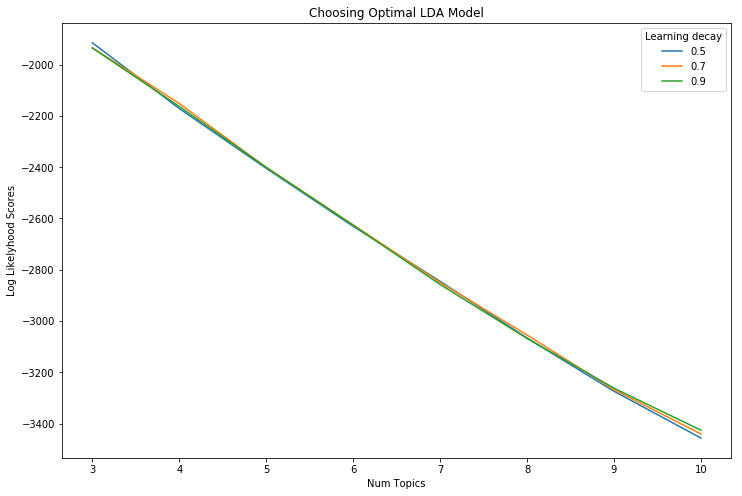

In [16]:
gscore=neg_lda.cv_results
n_topics = [3, 4, 5, 6, 7, 8, 9, 10]

log_likelyhoods_5 = [gscore['mean_test_score'][gscore['params'].index(v)] for v in gscore['params'] if v['learning_decay']==0.5]
log_likelyhoods_7 = [gscore['mean_test_score'][gscore['params'].index(v)] for v in gscore['params'] if v['learning_decay']==0.7]
log_likelyhoods_9 = [gscore['mean_test_score'][gscore['params'].index(v)] for v in gscore['params'] if v['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [17]:
neg_ldavis = pyLDAvis.sklearn.prepare(neg_lda, neg_lda.dtm, neg_lda.tfidf)

In [18]:
pyLDAvis.display(neg_ldavis)

In [38]:
def display_topics(model, feature_names, n_top_words):
    '''
    INPUTS:
        model - the model we created
        feature_names - tells us what word each column in the matric represents
        n_top_words - number of top words to display

    OUTPUTS:
        a dataframe that contains the topics we created and the weights of each token
    '''
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx+1)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-n_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx+1)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-n_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [39]:
display_topics(neg_lda, neg_lda.tfidf.get_feature_names(), 20)

,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights
0,cool,7.5,anywhere,1.2,unit,4.6
1,room,6.5,humidity,1.0,fan,4.5
2,air,6.5,feature,1.0,money,4.1
3,work,6.3,living,1.0,product,3.9
4,small,6.1,power,1.0,air,3.3
5,cold,5.9,machine,0.9,waste,3.3
6,fan,5.8,seem,0.9,dont,3.2
7,money,5.4,description,0.9,cold,3.2
8,like,5.3,btu,0.9,working,2.9
9,water,5.0,ituse,0.9,worth,2.9


In [46]:
results = neg_lda.transform(neg_lda.dtm)

In [119]:
results_df = pd.DataFrame(results).rename(columns={0: 'Topic 1', 1: 'Topic 2', 2: 'Topic 3'})
results_df

,Topic 1,Topic 2,Topic 3
0,0.852171,0.068941,0.078889
1,0.103003,0.070724,0.826273
2,0.830628,0.082885,0.086487
3,0.846745,0.074303,0.078952
4,0.056293,0.050117,0.893590
...,...,...,...
205,0.738911,0.155711,0.105378
206,0.099915,0.071515,0.828570
207,0.057714,0.047903,0.894383
208,0.893344,0.051051,0.055605


In [103]:
topic1_reviews = results_df.sort_values(0, ascending=False)
topic1_reviews_content = pd.merge(topic1_reviews, cleaned_ac_neg.reset_index(), left_index=True, right_index=True)

In [120]:
topic_reviews = pd.merge(results_df, cleaned_ac_neg.reset_index(), left_index=True, right_index=True)

In [150]:
topic1_reviews = topic_reviews.sort_values('Topic 1', ascending=False)[0:5][['Topic 1','asin','title','desc']]
topic2_reviews = topic_reviews.sort_values('Topic 2', ascending=False)[0:5][['Topic 2','asin','title','desc']]
topic3_reviews = topic_reviews.sort_values('Topic 3', ascending=False)[0:5][['Topic 3','asin','title','desc']]

In [153]:
topic3_reviews

,Topic 3,asin,title,desc
138,0.913287,B084H4B6NB,"Short life, poor cooling, high power drain. Av...",When received it worked well. I was irritat...
39,0.903234,B01DLPUWGW,Cheap Attachments Broke,The air conditioner itself is not too bad. I...
12,0.898478,B01DLPUWL2,"Caution! This thing is Garbage and UNSAFE, wor...",Tried using this for the first time since I ...
97,0.895677,B07RCZWQ7P,For small area -- INCREDIBLE !!!,I was cautiously optimistic based on reviews...
159,0.895227,B07V5F7483,Completely worthless. Does not work at all. Do...,It does not cool at all. In fact it raised t...


In [147]:
topic1_reviews.loc[96,'desc']

'  I bought this at Home Depot, but wanted to warn people:It’s a fan. There’s a compartment you fill with cold water, and supposedly the evaporation makes the air cooler.They recommend putting the filter in the freezer. I did that.They recommend using cold water—I did that, I even added ice cubes to it.It wasn’t any cooler than a regular fan.There are videos online where people do the same thing by simply putting frozen water bottles in front of a fan, and even show how the temperature on thermometers goes down.This unit didn’t do this.  It’s just a table top fan. The air that blows out isn’t any cooler than a fan, but you have to fill it, use ice water, use ice: all a waste.Very disappointing product, especially considering the price.'

In [149]:
topic1_reviews.loc[57,'desc']

'  So I saw some rating this very high. I saw YouTube glowing reviews! I got everything together put the vent in window turned on and wow really cold air right away, but the the P1 light came on meaning it needed to be drained this happend with in 30-40 of use and kept happening.  I\'ve also seen other\'s with the same issue as mine as well I took a chance to you need to be able to keep this draining and let me tell you it collects a lot of water on AC going So because of this big issue I give it a two star. I"m not sure if maybe I got a bad unit or something happened in shipping or if it was built bad from the start. I would not recommend it you shouldn\'t have to figure out how to keep this from filling up and putting a bucket down so it can keep draining.  You want a AC that if in your bedroom you can keep on most of the night.'

In [145]:
topic2_reviews.loc[48,'desc']

'  Like it...use everyday.'

In [123]:
import dash
import dash_table

In [126]:
table = dash_table.DataTable(
    id='table',
    columns=[{"name": i, "id": i} for i in topic1_reviews.columns],
    data=topic1_reviews.to_dict('records'),
)

table.show()

AttributeError: 'DataTable' object has no attribute 'show'

### Repeat for Positive

In [19]:
pos_lda = ReviewLDA()

In [20]:
pos_lda.fit(pos_preprocessed, validate=True)

12.362641096115112
-8876.57682108747
{'learning_decay': 0.9, 'n_components': 3}


LatentDirichletAllocation(learning_decay=0.9, n_components=3)

In [21]:
pos_ldavis = pyLDAvis.sklearn.prepare(pos_lda, pos_lda.dtm, pos_lda.tfidf)

In [22]:
pyLDAvis.display(pos_ldavis)

In [82]:
topics_df = display_topics(neg_lda, neg_lda.tfidf.get_feature_names(), 20)
topics_df

,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights
0,cool,7.5,anywhere,1.2,unit,4.6
1,room,6.5,humidity,1.0,fan,4.5
2,air,6.5,feature,1.0,money,4.1
3,work,6.3,living,1.0,product,3.9
4,small,6.1,power,1.0,air,3.3
5,cold,5.9,machine,0.9,waste,3.3
6,fan,5.8,seem,0.9,dont,3.2
7,money,5.4,description,0.9,cold,3.2
8,like,5.3,btu,0.9,working,2.9
9,water,5.0,ituse,0.9,worth,2.9


In [132]:
neg_topics_fig = go.Figure()
neg_topics_fig.add_trace(
    go.Bar(x=list(topics_df['Topic 1 words']),
               y=list(topics_df['Topic 1 weights']),
               name="Topic 1"))

neg_topics_fig.add_trace(
    go.Bar(x=list(topics_df['Topic 2 words']),
               y=list(topics_df['Topic 2 weights']),
               name="Topic 2"))

neg_topics_fig.add_trace(
    go.Bar(x=list(topics_df['Topic 3 words']),
               y=list(topics_df['Topic 3 weights']),
               name="Topic 3"))

neg_topics_fig.update_layout(
    updatemenus=[
        dict(
            active=3,
            buttons=list([
                dict(label="Topic 1",
                     method="update",
                     args=[{"visible": [True, False, False]},
                           {"title": "Topic 1"}]),
                dict(label="Topic 2",
                     method="update",
                     args=[{"visible": [False, True, False]},
                           {"title": "Topic 3"}]),
                dict(label="Topic 3",
                     method="update",
                     args=[{"visible": [False, False, True]},
                           {"title": "Topic 3"}]),
                dict(label="All Topics",
                     method="update",
                     args=[{"visible": [True, True, True]},
                           {"title": "All Topics"}])
            ]),
        )
    ])